## EE 502 P: Analytical Methods for Electrical Engineering
    
# Final project
## Due Thursday, December 16, 2021 at 11:59 PM
Copyright &copy; 2021, University of Washington

<hr>

**Instructions**: Choose **<u>one</u>** of the following problems. Solve the problem and then write up your solution in a stand-alone Jupyter Notebook. Your notebook should have the following elements:

- Problem statement
- Mathematical description of the solution
- Executable code, commented, clear code

You will be graded on how well your notebook reads like a nicely formated, well written report. You must:

- Write mathematical descriptions using complete sentences, paragraphs, and LaTeX formulas. 
- Comment your code as necessary, with a description of what each function does, and all major steps.
- Label plots axes, use legends, and use plot titles. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

<span style="color: red'">
Although you may discuss the project with others, you must turn in your own, original work.
</span>
 

# The DBLP Publication Network

This dataset for this problem can be found on Canvas, attached as a part of this assignment. 
  
The given data set contains a bipartite graph where the nodes are authors and academic papers. Each edge $(a,p)$ connects an author $a$ to a paper $p$. It contains 8.6 M edges (so it is a pretty large file). In this problem, we will analyze this data.

**Warmups:**

0. Find the minimum, maximum, and average, and standard deviation of the number of authors per paper.
0. Find the minimum, maximum, and average, and standard deviation of the number of papers per author.
0. Find the number of connected components of the network.
0. Pick several metrics on graphs, evaluate them for this graph, and interpret their meanings. 

**Main question:**

Find the (not necessarily unique) author who has written the most papers. Call this author $X$. An author other than $X$ has an $X$-index of 1 if she has co-authored at least one paper with $X$. An author has an $X$-index of 2 if she does not have an $X$-index of 1, but has co-authored a paper with someone who has an $X$-index of 1. Similarly, you can define having an $X$-index of 3, 4, etc. 

Write a method that produces the set of authors of a given index.

Make a plot with the $X$-index on the horizontal axis, and the number of authors with that $X$-index on the vertical axis. 

**Notes:** The network is encoded in the file above with two numbers per line separated by spaces. You will need to read that file using open and 'file.read' and turn it into a Python data string. Then use `split` to get a list of numbers. The numbers at even indices (starting at 0) are authors, and the numbers at odd indices are publications. Be careful not to do things that take a lot of operations or memory. The `networkx` library should work, as long as you don't try to draw the graph.

Also, you should develop your code using a smaller subset of the data so you do not spend a lot of time waiting. To facilitate this, we have put smaller subsets of the data here: 

  https://drive.google.com/drive/u/0/folders/1vwYKhqiD5GEFQi8WBMr63e2EUuk3DB22

The short version has 1,000 edges, the medium has 10,000 edges, the long version has 100,000 edges, and the "all" version has all the edges.

#  **Short**

The number of X-index= 1 is 20
The number of X-index= 2 is 5
The number of X-index= 3 is 0


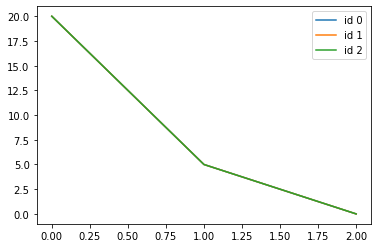

In [16]:
import collections as co
import statistics
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt


file = open('/content/out.dblp-author-short.txt')
file = file.read() #file type is a string
file = file.split() # file type is a list
list_author = file[::2] # even
list_publications = file[1::2]#odd
res_publications = co.Counter(list_publications)
res_author = co.Counter(list_author)
list_int_author = list(map(int,list_author))
list_int_publications = list(map(int,list_publications))

most_author = res_author.most_common(1) # 写论文最多的人'59',数量12，X
a = most_author[0]
b,c = a
b = int(b)
author_applied = []
publications_applied = []
result_y = []
result_x = range(0,3)
xindex = 3
for p in range(xindex):
  if p == 0:
    publications_index_1 = [] #x的论文集 即 xindex=1的论文集
    for i in range(len(list_int_author)):
      if list_int_author[i] == b:
        publications_index_1.append(list_int_publications[i])
    publications_applied = publications_applied + publications_index_1

    publications_index_1_index = [] #xindex = 1的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_1:
        if key == list_int_publications[i]:
          publications_index_1_index.append(i)

    author_index_1 = [] #xindex =1的作者集
    for key in publications_index_1_index:
      author_index_1.append(list_int_author[key])
    author_index_1 = list(set(author_index_1)) #转为集合，去掉重复元素

    author_applied = author_applied + [b]
    author_index_1 = [i for i in author_index_1 if i not in author_applied]
    author_applied = author_applied + author_index_1
#    print('X-index=',p+1,':',author_index_1)
    print('The number of X-index=',p+1,'is',len(author_index_1))
    result_y.append(len(author_index_1))

  elif p == 1:
    publications_index_2 = [] #xindex=5的论文集
    for i in range(len(list_int_author)):
      for key in author_index_1: ##################3
        if list_int_author[i] == key:
          publications_index_2.append(list_int_publications[i])
    publications_index_2 = list(set(publications_index_2))
    publications_index_2 = [i for i in publications_index_2 if i not in publications_applied]
    publications_applied = publications_applied + publications_index_2
    publications_index_2_index = [] #xindex = 5的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_2:
        if key == list_int_publications[i]:
          publications_index_2_index.append(i)
    author_index_2 = [] #xindex =5的作者集
    for key in publications_index_2_index:
      author_index_2.append(list_int_author[key])
    author_index_2 = list(set(author_index_2)) #转为集合，去掉重复元素
    author_index_2 = [i for i in author_index_2 if i not in author_applied]
    author_applied = author_applied + author_index_2
#    print('X-index=',p+1,':',author_index_5)
    print('The number of X-index=',p+1,'is',len(author_index_2))
    result_y.append(len(author_index_2))
  elif p > 1:
    publications_index_x = [] #xindex的论文集
    for i in range(len(list_int_author)):
      for key in author_index_x: 
        if list_int_author[i] == key:
          publications_index_x.append(list_int_publications[i])
    publications_index_x = list(set(publications_index_x))
    publications_index_x = [i for i in publications_index_x if i not in publications_applied]
    publications_applied = publications_applied + publications_index_x
    publications_index_x_index = [] #xindex 的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_x:
        if key == list_int_publications[i]:
          publications_index_x_index.append(i)
    author_index_x = [] #xindex 的作者集
    for key in publications_index_x_index:
      author_index_x.append(list_int_author[key])
    author_index_x = list(set(author_index_x)) #转为集合，去掉重复元素
    author_index_x = [i for i in author_index_x if i not in author_applied]
    author_applied = author_applied + author_index_x
#    print('X-index=',p+1,':',author_index_5)
    print('The number of X-index=',p+1,'is',len(author_index_x))
    result_y.append(len(author_index_x))

for i in range(len(result_y)):
  plt.plot(result_x,result_y)
plt.show()

# **medium**

The number of X-index= 1 is 51
The number of X-index= 2 is 34
The number of X-index= 3 is 8
The number of X-index= 4 is 12
The number of X-index= 5 is 8
The number of X-index= 6 is 3


No handles with labels found to put in legend.


The number of X-index= 7 is 0


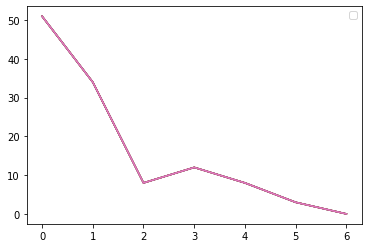

In [ ]:
import collections as co
import statistics
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt


file = open('/content/out.dblp-author-medium.txt')
file = file.read() #file type is a string
file = file.split() # file type is a list
list_author = file[::2] # even
list_publications = file[1::2]#odd
res_publications = co.Counter(list_publications)
res_author = co.Counter(list_author)
list_int_author = list(map(int,list_author))
list_int_publications = list(map(int,list_publications))

most_author = res_author.most_common(1) # 写论文最多的人'59',数量12，X
a = most_author[0]
b,c = a
b = int(b)
author_applied = []
publications_applied = []

xindex = 7
result_y = []
result_x = range(0,xindex)

for p in range(xindex):

  if p == 0:

    publications_index_1 = [] #x的论文集 即 xindex=1的论文集
    for i in range(len(list_int_author)):
      if list_int_author[i] == b:
        publications_index_1.append(list_int_publications[i])
    publications_applied = publications_applied + publications_index_1

    publications_index_1_index = [] #xindex = 1的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_1:
        if key == list_int_publications[i]:
          publications_index_1_index.append(i)

    author_index_1 = [] #xindex =1的作者集
    for key in publications_index_1_index:
      author_index_1.append(list_int_author[key])
    author_index_1 = list(set(author_index_1)) #转为集合，去掉重复元素

    author_applied = author_applied + [b]
    author_index_1 = [i for i in author_index_1 if i not in author_applied]
    author_applied = author_applied + author_index_1
#    print('X-index=',p+1,':',author_index_1)
    print('The number of X-index=',p+1,'is',len(author_index_1))
    result_y.append(len(author_index_1))

  elif p == 1:

    publications_index_x = [] #xindex的论文集
    for i in range(len(list_int_author)):
      for key in author_index_1:
        if list_int_author[i] == key:
          publications_index_x.append(list_int_publications[i])
    publications_index_x = list(set(publications_index_x))
    publications_index_x = [i for i in publications_index_x if i not in publications_applied]
    publications_applied = publications_applied + publications_index_x

    publications_index_x_index = [] #xindex 的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_x:
        if key == list_int_publications[i]:
          publications_index_x_index.append(i)

    author_index_x = [] #xindex 的作者集
    for key in publications_index_x_index:
      author_index_x.append(list_int_author[key])
    author_index_x = list(set(author_index_x)) #转为集合，去掉重复元素
    author_index_x = [i for i in author_index_x if i not in author_applied]
    author_applied = author_applied + author_index_x
#    print('X-index=',p+1,':',author_index_5)
    print('The number of X-index=',p+1,'is',len(author_index_x))
    result_y.append(len(author_index_x))

  elif p > 1:

    publications_index_x = [] #xindex的论文集
    for i in range(len(list_int_author)):
      for key in author_index_x: 
        if list_int_author[i] == key:
          publications_index_x.append(list_int_publications[i])
    publications_index_x = list(set(publications_index_x))
    publications_index_x = [i for i in publications_index_x if i not in publications_applied]
    publications_applied = publications_applied + publications_index_x

    publications_index_x_index = [] #xindex 的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_x:
        if key == list_int_publications[i]:
          publications_index_x_index.append(i)

    author_index_x = [] #xindex 的作者集
    for key in publications_index_x_index:
      author_index_x.append(list_int_author[key])
    author_index_x = list(set(author_index_x)) #转为集合，去掉重复元素
    author_index_x = [i for i in author_index_x if i not in author_applied]
    author_applied = author_applied + author_index_x
#    print('X-index=',p+1,':',author_index_5)
    print('The number of X-index=',p+1,'is',len(author_index_x))
    result_y.append(len(author_index_x))
    
for i in range(len(result_y)):
  plt.plot(result_x,result_y)
plt.show()

# **long**

The number of X-index= 1 is 70
The number of X-index= 2 is 65
The number of X-index= 3 is 23
The number of X-index= 4 is 49
The number of X-index= 5 is 94
The number of X-index= 6 is 156
The number of X-index= 7 is 146
The number of X-index= 8 is 121
The number of X-index= 9 is 309
The number of X-index= 10 is 458
The number of X-index= 11 is 655
The number of X-index= 12 is 1207
The number of X-index= 13 is 2322
The number of X-index= 14 is 4266
The number of X-index= 15 is 5309
The number of X-index= 16 is 3922
The number of X-index= 17 is 2688
The number of X-index= 18 is 1914
The number of X-index= 19 is 1184
The number of X-index= 20 is 650
The number of X-index= 21 is 340
The number of X-index= 22 is 164
The number of X-index= 23 is 93
The number of X-index= 24 is 47
The number of X-index= 25 is 15
The number of X-index= 26 is 6
The number of X-index= 27 is 4


No handles with labels found to put in legend.


The number of X-index= 28 is 0
The number of X-index= 29 is 0
The number of X-index= 30 is 0


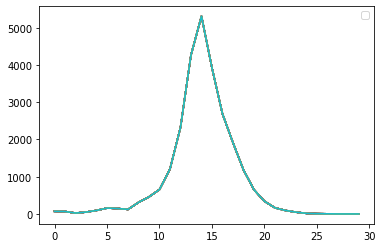

In [23]:
import collections as co
import statistics
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt


file = open('/content/out.dblp-author-long.txt')
file = file.read() #file type is a string
file = file.split() # file type is a list
list_author = file[::2] # even
list_publications = file[1::2]#odd
res_publications = co.Counter(list_publications)
res_author = co.Counter(list_author)
list_int_author = list(map(int,list_author))
list_int_publications = list(map(int,list_publications))

most_author = res_author.most_common(1) # 写论文最多的人'59',数量12，X
a = most_author[0]
b,c = a
b = int(b)
author_applied = []
publications_applied = []

xindex = 30
result_y = []
result_x = range(0,xindex)

for p in range(xindex):

  if p == 0:

    publications_index_1 = [] #x的论文集 即 xindex=1的论文集
    for i in range(len(list_int_author)):
      if list_int_author[i] == b:
        publications_index_1.append(list_int_publications[i])
    publications_applied = publications_applied + publications_index_1

    publications_index_1_index = [] #xindex = 1的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_1:
        if key == list_int_publications[i]:
          publications_index_1_index.append(i)

    author_index_1 = [] #xindex =1的作者集
    for key in publications_index_1_index:
      author_index_1.append(list_int_author[key])
    author_index_1 = list(set(author_index_1)) #转为集合，去掉重复元素

    author_applied = author_applied + [b]
    author_index_1 = [i for i in author_index_1 if i not in author_applied]
    author_applied = author_applied + author_index_1
#    print('X-index=',p+1,':',author_index_1)
    print('The number of X-index=',p+1,'is',len(author_index_1))
    result_y.append(len(author_index_1))

  elif p == 1:

    publications_index_x = [] #xindex的论文集
    for i in range(len(list_int_author)):
      for key in author_index_1:
        if list_int_author[i] == key:
          publications_index_x.append(list_int_publications[i])
    publications_index_x = list(set(publications_index_x))
    publications_index_x = [i for i in publications_index_x if i not in publications_applied]
    publications_applied = publications_applied + publications_index_x

    publications_index_x_index = [] #xindex 的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_x:
        if key == list_int_publications[i]:
          publications_index_x_index.append(i)

    author_index_x = [] #xindex 的作者集
    for key in publications_index_x_index:
      author_index_x.append(list_int_author[key])
    author_index_x = list(set(author_index_x)) #转为集合，去掉重复元素
    author_index_x = [i for i in author_index_x if i not in author_applied]
    author_applied = author_applied + author_index_x
#    print('X-index=',p+1,':',author_index_5)
    print('The number of X-index=',p+1,'is',len(author_index_x))
    result_y.append(len(author_index_x))

  elif p > 1:

    publications_index_x = [] #xindex的论文集
    for i in range(len(list_int_author)):
      for key in author_index_x: 
        if list_int_author[i] == key:
          publications_index_x.append(list_int_publications[i])
    publications_index_x = list(set(publications_index_x))
    publications_index_x = [i for i in publications_index_x if i not in publications_applied]
    publications_applied = publications_applied + publications_index_x

    publications_index_x_index = [] #xindex 的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_x:
        if key == list_int_publications[i]:
          publications_index_x_index.append(i)

    author_index_x = [] #xindex 的作者集
    for key in publications_index_x_index:
      author_index_x.append(list_int_author[key])
    author_index_x = list(set(author_index_x)) #转为集合，去掉重复元素
    author_index_x = [i for i in author_index_x if i not in author_applied]
    author_applied = author_applied + author_index_x
#    print('X-index=',p+1,':',author_index_5)
    print('The number of X-index=',p+1,'is',len(author_index_x))
    result_y.append(len(author_index_x))
    
for i in range(len(result_y)):
  plt.plot(result_x,result_y)
plt.show()

# **all**

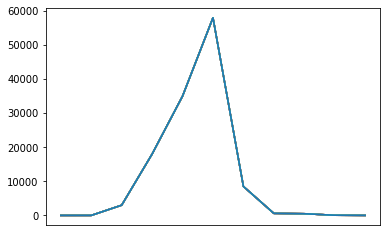

In [24]:
import collections as co
import statistics
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt


file = open('/content/out.dblp-author-all.txt')
file = file.read() #file type is a string
file = file.split() # file type is a list
list_author = file[::2] # even
list_publications = file[1::2]#odd
res_publications = co.Counter(list_publications)
res_author = co.Counter(list_author)
list_int_author = list(map(int,list_author))
list_int_publications = list(map(int,list_publications))

most_author = res_author.most_common(1) # 写论文最多的人'59',数量12，X
a = most_author[0]
b,c = a
b = int(b)
author_applied = []
publications_applied = []

xindex = 30
result_y = []
result_x = range(0,xindex)

for p in range(xindex):

  if p == 0:

    publications_index_1 = [] #x的论文集 即 xindex=1的论文集
    for i in range(len(list_int_author)):
      if list_int_author[i] == b:
        publications_index_1.append(list_int_publications[i])
    publications_applied = publications_applied + publications_index_1

    publications_index_1_index = [] #xindex = 1的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_1:
        if key == list_int_publications[i]:
          publications_index_1_index.append(i)

    author_index_1 = [] #xindex =1的作者集
    for key in publications_index_1_index:
      author_index_1.append(list_int_author[key])
    author_index_1 = list(set(author_index_1)) #转为集合，去掉重复元素

    author_applied = author_applied + [b]
    author_index_1 = [i for i in author_index_1 if i not in author_applied]
    author_applied = author_applied + author_index_1
#    print('X-index=',p+1,':',author_index_1)
    print('The number of X-index=',p+1,'is',len(author_index_1))
    result_y.append(len(author_index_1))

  elif p == 1:

    publications_index_x = [] #xindex的论文集
    for i in range(len(list_int_author)):
      for key in author_index_1:
        if list_int_author[i] == key:
          publications_index_x.append(list_int_publications[i])
    publications_index_x = list(set(publications_index_x))
    publications_index_x = [i for i in publications_index_x if i not in publications_applied]
    publications_applied = publications_applied + publications_index_x

    publications_index_x_index = [] #xindex 的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_x:
        if key == list_int_publications[i]:
          publications_index_x_index.append(i)

    author_index_x = [] #xindex 的作者集
    for key in publications_index_x_index:
      author_index_x.append(list_int_author[key])
    author_index_x = list(set(author_index_x)) #转为集合，去掉重复元素
    author_index_x = [i for i in author_index_x if i not in author_applied]
    author_applied = author_applied + author_index_x
#    print('X-index=',p+1,':',author_index_5)
    print('The number of X-index=',p+1,'is',len(author_index_x))
    result_y.append(len(author_index_x))

  elif p > 1:

    publications_index_x = [] #xindex的论文集
    for i in range(len(list_int_author)):
      for key in author_index_x: 
        if list_int_author[i] == key:
          publications_index_x.append(list_int_publications[i])
    publications_index_x = list(set(publications_index_x))
    publications_index_x = [i for i in publications_index_x if i not in publications_applied]
    publications_applied = publications_applied + publications_index_x

    publications_index_x_index = [] #xindex 的论文在论文总集中的索引的集
    for i in range(len(list_int_publications)):
      for key in publications_index_x:
        if key == list_int_publications[i]:
          publications_index_x_index.append(i)

    author_index_x = [] #xindex 的作者集
    for key in publications_index_x_index:
      author_index_x.append(list_int_author[key])
    author_index_x = list(set(author_index_x)) #转为集合，去掉重复元素
    author_index_x = [i for i in author_index_x if i not in author_applied]
    author_applied = author_applied + author_index_x
#    print('X-index=',p+1,':',author_index_5)
    print('The number of X-index=',p+1,'is',len(author_index_x))
    result_y.append(len(author_index_x))
    
for i in range(len(result_y)):
  plt.plot(result_x,result_y)
plt.show()